In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv("customer_segmentation.csv")

Dataset Metadata View

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
df.shape

(2240, 29)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Dealing wih Missing Values

In [14]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(2216, 29)

Monitoring Dataset (with no missing values)

In [15]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216,2216,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,662,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1116,857,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5588.353339,1968.820397,NaN,NaN,52247.251354,0.441787,0.505415,NaN,49.012635,305.091606,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,NaN,NaN,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,24.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,174.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,505.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [16]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [17]:
df['Marital_Status'].value_counts()


Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Feature Engineering

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [19]:
df['Age'] = pd.Timestamp('today').year - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,42
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,45


In [20]:
df['Total_Children'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,69,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,72,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,61,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,42,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,45,1


In [21]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [22]:
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [23]:
df['Total_Spending'] = df[spend_cols].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,69,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,72,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,61,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,42,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,45,1,422


In [24]:
df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,69,0,1617,4879
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,72,2,27,4329
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,61,0,776,4528
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,42,1,53,4355
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,45,1,422,4377


Expository Data Analysis

Text(0.5, 1.0, 'Age Distribution')

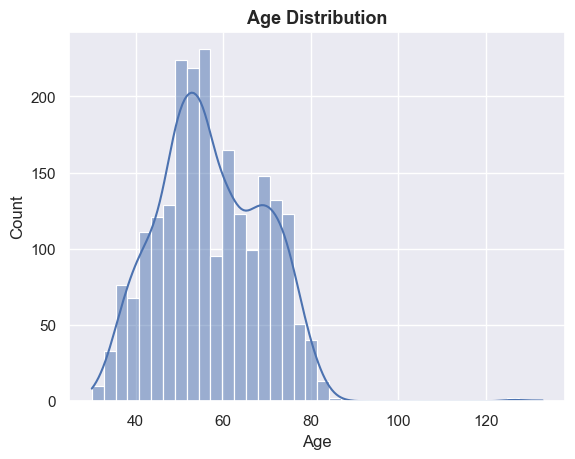

In [25]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution', fontweight= 'bold', size=13)

Text(0.5, 1.0, 'Income Distribution')

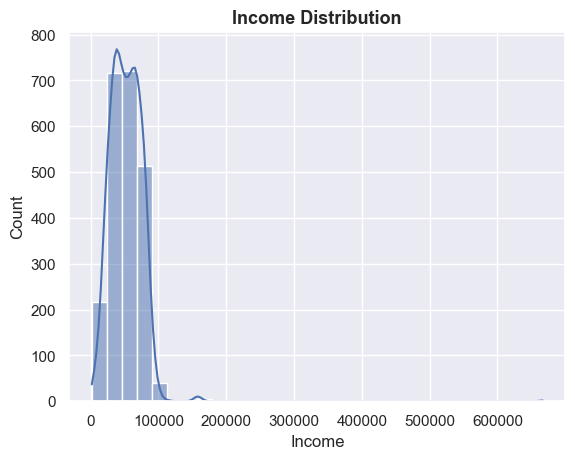

In [26]:
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Income Distribution', weight='bold', size =13)

Text(0.5, 1.0, 'Total Spending Distribution')

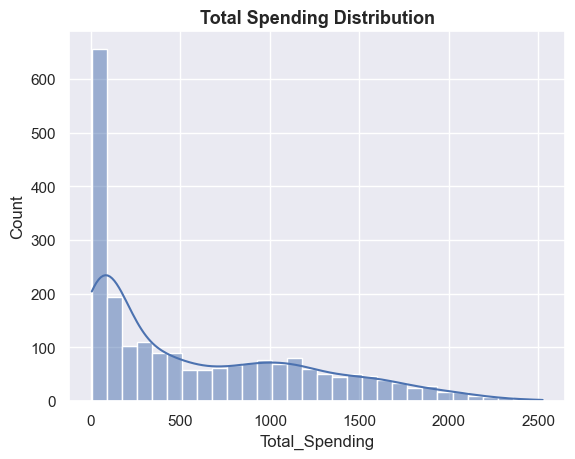

In [27]:
sns.histplot(df['Total_Spending'], kde=True, bins=30)
plt.title('Total Spending Distribution', weight='bold', size=13)

Text(0.5, 1.0, 'Income by Education Level')

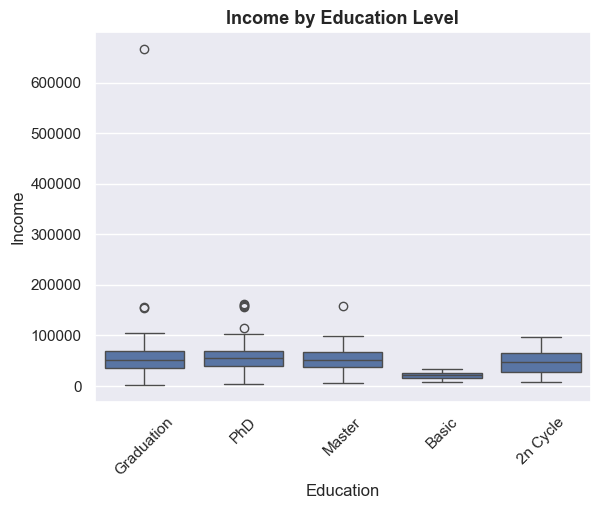

In [28]:
sns.boxplot(x='Education', y='Income', data=df)
plt.xticks(rotation=45)
plt.title('Income by Education Level', size = 13, weight='bold')

Text(0.5, 1.0, 'Total Spending by Marital Status')

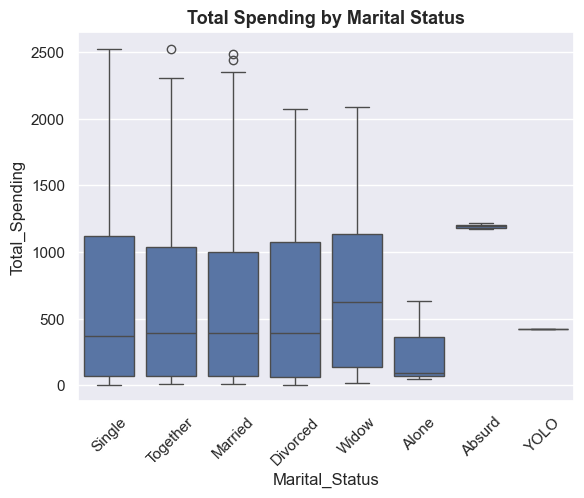

In [29]:
sns.boxplot(x ='Marital_Status', y='Total_Spending', data = df)
plt.xticks(rotation=45)
plt.title('Total Spending by Marital Status', size = 13, weight= 'bold')


Correlation Analysis

In [30]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [31]:
corr = df[['Income', 'Age', 'Recency', 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases']].corr()


In [32]:
corr 

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


<Axes: >

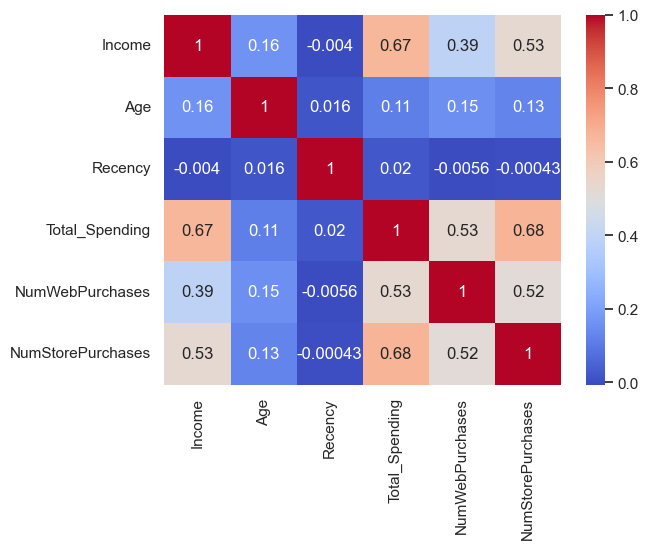

In [33]:
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

Data Grouping

In [34]:
pivot_income =pd.pivot_table(data=df, values='Income', index='Education', columns='Marital_Status', aggfunc='mean')
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education and Marital Status')

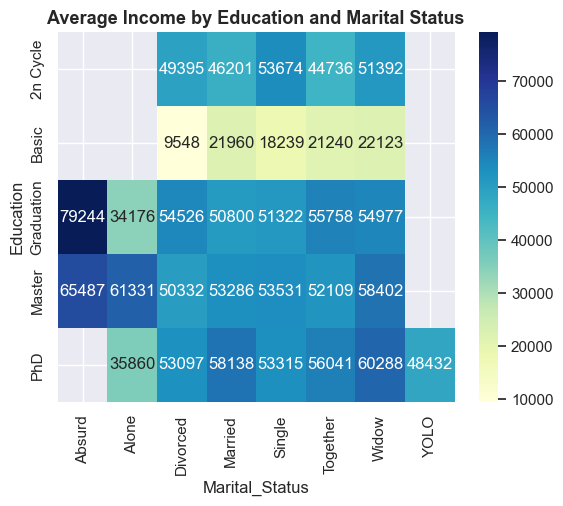

In [35]:
sns.heatmap(data=pivot_income, annot=True, fmt = '.0f',cmap='YlGnBu')
plt.title('Average Income by Education and Marital Status', weight='bold', size=13)

In [36]:
group1 = df.groupby('Education')['Total_Spending'].mean().sort_values(ascending=True)
group1

Education
Basic          81.796296
2n Cycle      494.930000
Master        609.767123
Graduation    621.686380
PhD           676.733888
Name: Total_Spending, dtype: float64

Text(0.5, 1.0, 'Average Spending by Education')

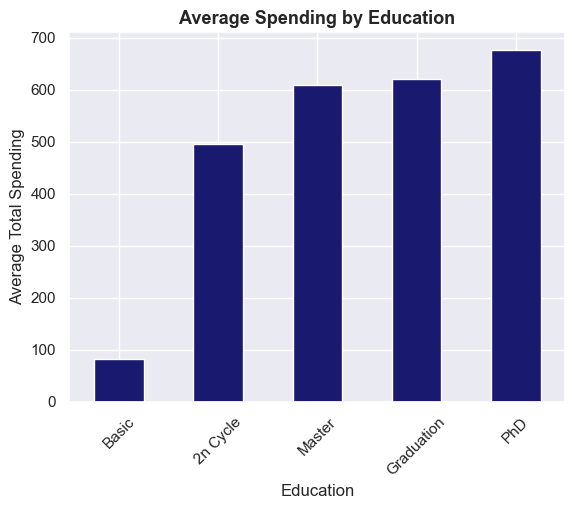

In [37]:
group1.plot(kind='bar', color='midnightblue')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=45)
plt.title('Average Spending by Education', size=13, weight='bold')

In [38]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [39]:
df['AcceptedAny'] = df[[ 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']].sum(axis=1)

df['AcceptedAny'].unique()

array([0, 1, 2, 3, 4])

In [40]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x:1 if x>0 else 0)
df['AcceptedAny'].unique()

array([0, 1])

In [41]:
group2 = df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=True)
group2

Marital_Status
YOLO        0.000000
Divorced    0.198276
Together    0.200698
Single      0.205945
Married     0.211202
Widow       0.236842
Alone       0.333333
Absurd      0.500000
Name: AcceptedAny, dtype: float64

Text(0.5, 1.0, 'Marital Status by Accepted Any')

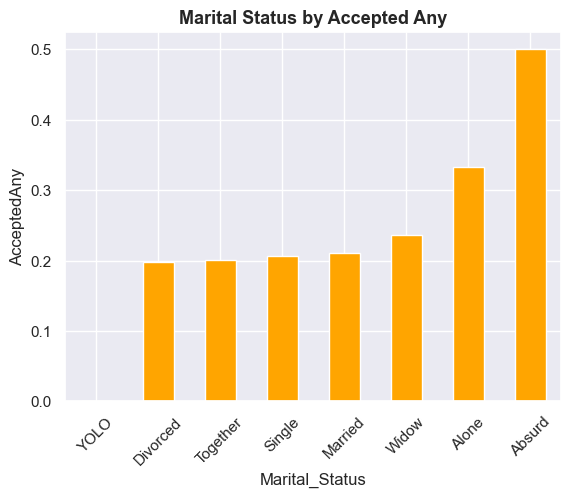

In [42]:
group2.plot(kind='bar', color='orange')
plt.ylabel('AcceptedAny')
plt.xticks(rotation=45)
plt.title('Marital Status by Accepted Any', size = 13, weight='bold')

Income by Age Groups


In [43]:
df['Age'].unique()

array([ 69,  72,  61,  42,  45,  59,  55,  41,  52,  76,  50,  67,  74,
        39,  80,  46,  77,  44,  47,  75,  57,  37,  63,  56,  53,  83,
        51,  30,  58,  62,  49,  48,  71,  60,  38,  78,  68,  54,  66,
        43,  81,  35,  64,  73,  70,  34,  65, 126,  40, 133,  36,  79,
       127,  33,  32,  85,  82,  31,  86])

In [44]:
df['Age'].min()

30

In [45]:
labels = ['18-29', '30-39','40-49','50-59', '60-69', '70+']
bins = [18,30,40,50,60,70,90]

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['AgeGroup']

0       60-69
1         70+
2       60-69
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [46]:
group_3 = df.groupby('AgeGroup')['Income'].mean().sort_values(ascending=True)

C:\Users\-\AppData\Local\Temp\ipykernel_25220\1603144694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_3 = df.groupby('AgeGroup')['Income'].mean().sort_values(ascending=True)


Text(0.5, 1.0, 'Income by Age Group')

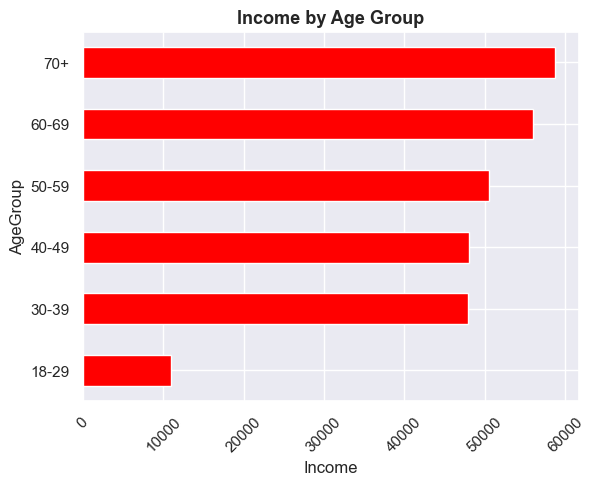

In [47]:
group_3.plot(kind= 'barh', color = 'red')
plt.xticks(rotation=45)
plt.xlabel('Income')
plt.title('Income by Age Group', size =13, weight='bold')

Training of Cluster Model

In [48]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [49]:
features = ['Age', 'Income', 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']

In [50]:
x = df[features].copy()
x.head()

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,69,58138.0,1617,8,4,7,58
1,72,46344.0,27,1,2,5,38
2,61,71613.0,776,8,10,4,26
3,42,26646.0,53,2,4,6,26
4,45,58293.0,422,5,6,5,94


In [51]:
scaler = StandardScaler()

In [52]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [53]:
wcss = []
for k in range(1,20):
    kmeans = KMeans(k)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
print (wcss, end='')

[15511.999999999985, 10218.648106906192, 9007.783808892225, 8395.837469188118, 7698.555715420786, 7193.408233792408, 6721.122832992341, 6451.555740198017, 6306.560430034275, 5854.181787950192, 5396.179256139423, 5318.235846259588, 5098.106928103223, 4964.736205899628, 4810.910054912613, 4650.798180823795, 4632.816306393526, 4442.8847523070635, 4324.2117686769325]

Text(0.5, 0, 'Numbers of cluster')

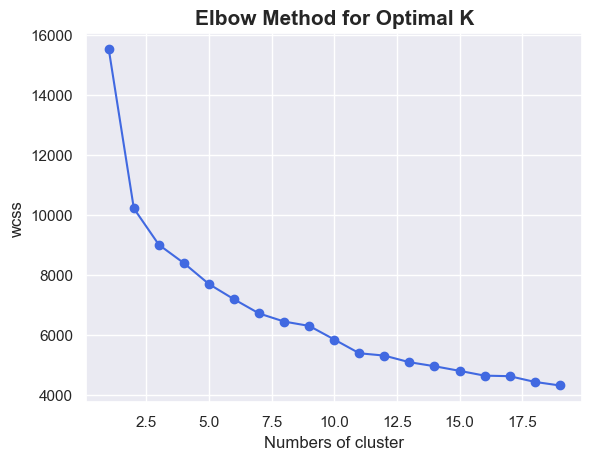

In [54]:
plt.plot(range(1,20), wcss, color = 'royalblue', marker='o')
plt.title('Elbow Method for Optimal K', size=15, weight='bold')
plt.ylabel('wcss')
plt.xlabel('Numbers of cluster')

In [55]:
kmeans = KMeans(n_clusters=10)
df['Cluster'] = kmeans.fit_predict(x_scaled)
df['Cluster']

0       8
1       5
2       3
3       1
4       2
       ..
2235    8
2236    8
2237    3
2238    0
2239    5
Name: Cluster, Length: 2216, dtype: int32

In [56]:
cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,70.281588,74418.173285,1236.498195,4.566787,8.924188,2.617329,43.046931
1,48.189189,30010.875676,79.856757,1.859459,2.956757,6.691892,26.197297
2,49.702128,31493.349544,97.373860,2.237082,3.079027,7.173252,76.951368
3,55.093137,65464.651961,1098.784314,7.269608,10.676471,5.509804,61.098039
4,47.202952,78756.365314,1384.479705,4.383764,7.981550,2.295203,51.029520
5,68.807292,39884.286458,120.786458,2.239583,3.510417,6.010417,28.468750
6,67.476190,48686.724868,253.740741,2.724868,4.460317,4.571429,78.994709
7,53.888372,52485.446512,535.934884,5.786047,6.195349,6.427907,30.316279
8,68.035714,60668.833333,925.023810,8.934524,6.446429,6.392857,50.285714


In [57]:
df['Cluster'].value_counts().sort_index()

Cluster
0    277
1    370
2    329
3    204
4    271
5    192
6    189
7    215
8    168
9      1
Name: count, dtype: int64

In [58]:
pca  = PCA(n_components=2)
pca_data = pca.fit_transform(x_scaled)
df['PCA1'], df['PCA2'] = pca_data[:,0], pca_data[:,1] 

<Axes: xlabel='PCA1', ylabel='PCA2'>

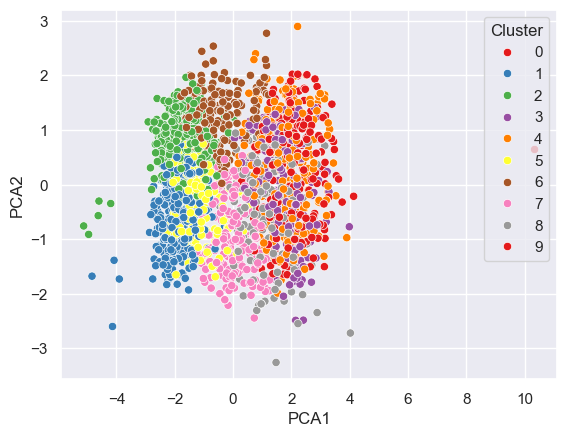

In [59]:
sns.scatterplot(x='PCA1', y='PCA2', data = df, hue='Cluster', palette='Set1')

In [60]:
import joblib

In [61]:
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']